<a href="https://colab.research.google.com/github/IamGyal/Gyal/blob/master/beginner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
#This file has been modified.

# TensorFlow 2 quickstart for beginners

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/quickstart/beginner"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Build a neural network that classifies images.
2. Train this neural network.
3. And, finally, evaluate the accuracy of the model.

This is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook file. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. Run all the notebook code cells: Select *Runtime* > *Run all*.

Download and install TensorFlow 2. Import TensorFlow into your program:

Note: Upgrade `pip` to install the TensorFlow 2 package. See the [install guide](https://www.tensorflow.org/install) for details.

In [24]:
import tensorflow as tf

In [26]:
mnist = tf.keras.datasets.mnist

In [59]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [36]:
x_train.shape

(60000, 28, 28)

In [37]:
y_train.shape

(60000,)

In [38]:
type(y_train)

numpy.ndarray

In [30]:
import matplotlib.pyplot as plt

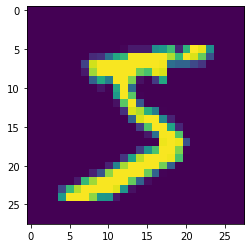

In [42]:
plt.imshow(x_train[0])

In [44]:
print(y_train)
print(y_train[0])

[5 0 4 ... 5 6 8]
5


In [47]:
x_test.shape

(10000, 28, 28)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

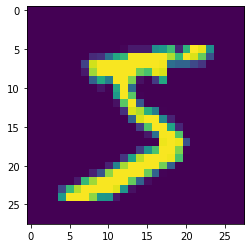

In [60]:
print(x_train[0])
plt.imshow(x_train[0])
print(y_train[0])

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). Convert the samples from integers to floating-point numbers:

In [61]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

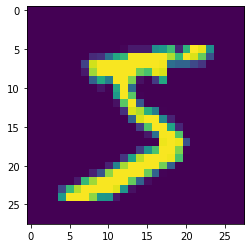

In [62]:
print(x_train[0])
plt.imshow(x_train[0])

Build the `tf.keras.Sequential` model by stacking layers. Choose an optimizer and loss function for training:

> 들여쓴 블록



In [63]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),  # to make 2D -> 1D
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),                   # to avoid Overfitting
  tf.keras.layers.Dense(10)                       # output. 10 bc 0 to 9.
])

In [65]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


For each example the model returns a vector of "[logits](https://developers.google.com/machine-learning/glossary#logits)" or "[log-odds](https://developers.google.com/machine-learning/glossary#log-odds)" scores, one for each class.

array([[ 0.40999264, -0.09471103, -0.41680908, -0.3255488 ,  0.9123688 ,
         0.01359819, -0.30353928,  0.1346691 , -0.13171469, -0.51040405]],
      dtype=float32)

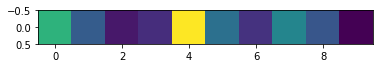

In [72]:
#print(x_train[:1])
plt.imshow(model(x_train[:1]))
predictions = model(x_train[:1]).numpy()
predictions

The `tf.nn.softmax` function converts these logits to "probabilities" for each class: 

In [73]:
tf.nn.softmax(predictions).numpy()

array([[0.14134048, 0.08532505, 0.06182884, 0.06773685, 0.23358543,
        0.09508558, 0.06924424, 0.10732356, 0.08222541, 0.05630453]],
      dtype=float32)

Note: It is possible to bake this `tf.nn.softmax` in as the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to
provide an exact and numerically stable loss calculation for all models when using a softmax output. 

The `losses.SparseCategoricalCrossentropy` loss takes a vector of logits and a `True` index and returns a scalar loss for each example.

In [74]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

This loss is equal to the negative log probability of the true class:
It is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.log(1/10) ~= 2.3`.

In [75]:
loss_fn(y_train[:1], predictions).numpy()

2.352978

In [76]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

The `Model.fit` method adjusts the model parameters to minimize the loss: 

In [77]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2993 - accuracy: 0.9127
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1424 - accuracy: 0.9575
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1060 - accuracy: 0.9677
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0893 - accuracy: 0.9722
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0741 - accuracy: 0.9762


In [82]:
output = tf.nn.softmax(model(x_train[:1])).numpy()
output

array([[2.1555077e-11, 8.9265226e-09, 4.4319332e-08, 5.4042362e-02,
        1.3285827e-19, 9.4595766e-01, 2.3230769e-13, 7.4937299e-11,
        5.1495963e-10, 3.7983529e-08]], dtype=float32)

In [83]:
import numpy as np
np.argmax(output)

5

The `Model.evaluate` method checks the models performance, usually on a "[Validation-set](https://developers.google.com/machine-learning/glossary#validation-set)" or "[Test-set](https://developers.google.com/machine-learning/glossary#test-set)".

In [84]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0773 - accuracy: 0.9764


[0.07733455300331116, 0.9764000177383423]

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [85]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [86]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.30635135e-06, 1.78201685e-08, 1.77071488e-05, 5.08276979e-04,
        3.42946049e-12, 2.62990284e-06, 1.95965401e-12, 9.99464691e-01,
        3.48079425e-06, 1.82761960e-06],
       [4.98470101e-08, 1.37285359e-04, 9.99857783e-01, 1.76812273e-06,
        4.55526378e-16, 1.03580101e-06, 1.16336128e-06, 3.61912919e-14,
        9.93336698e-07, 9.29838151e-11],
       [1.69350898e-07, 9.98818457e-01, 1.40481410e-04, 2.01489293e-05,
        7.47116064e-06, 1.42469980e-06, 1.25076285e-05, 8.17773631e-04,
        1.78085276e-04, 3.49302400e-06],
       [9.99945641e-01, 7.89483322e-12, 1.62633569e-05, 2.46996077e-08,
        9.73545333e-09, 5.17417959e-07, 3.66854101e-06, 8.67642029e-06,
        2.61934368e-08, 2.52982845e-05],
       [6.42388341e-06, 6.43156728e-09, 4.53213106e-05, 4.11133044e-07,
        9.79842603e-01, 2.89651507e-06, 2.41202088e-06, 2.57018197e-04,
        3.70041607e-06, 1.98391024e-02]], dtype=float32)>

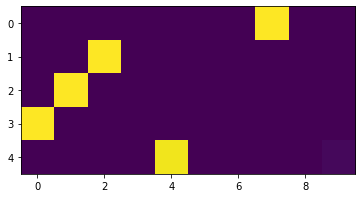

In [87]:
plt.imshow(probability_model(x_test[:5]))

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

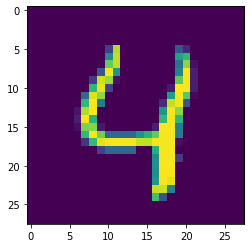

In [91]:
print(x_test[4])
plt.imshow(x_test[4])